# HW4 Question2             
### ChujunChen

In [101]:
import pandas as pd
import numpy as np
df_in= pd.read_csv("VTINP16_upd.txt")
a= [1,2,6,7]
                  
df_in_4insurance =df_in[df_in['PPAY'].isin([1,2,6,7])]

#df_in_4insurance.apply(df_in_4insurance.CHRGS.to_numeric, errors = ‘coerce’)
df_in_4insurance=df_in_4insurance.apply(pd.to_numeric,errors='coerce')
df_in_4insurance["CHRGS"] = pd.to_numeric(df_in_4insurance["CHRGS"])

df_in_4insurance = df_in_4insurance.dropna(subset=["CHRGS"])


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,5,8,54,55,73,74,75,76,78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [108]:
pd.options.display.max_columns = None

In [110]:

MDC_Ins=df_in_4insurance.groupby([ 'MDC','PPAY'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)

cats_insurance = ['MEDICARE', 'MEDICAID', 'BLUE CROSS', 'COMMERCIAL INSURANCE']
cats_mdc = ['BRAIN AND CNS','EYE','EAR, NOSE & THROAT','RESPIRATORY','HEART CIRCULATORY','DIGESTIVE',
'LIVER & PANCREAS','MUSCULOSKELETAL','SKIN AND BREAST','ENDOCRINE','KIDNEY & URINARY','MALE REPRODUCTIVE',
'FEMALE REPRODUCTIVE','PREGNANCY, CHILDBIRTH AND THE PUERPERIUM','NEONATAL','SPLEEN & BLOOD','LYMPHATIC',
'INFECTION','MENTAL ILLNESS','SUBSTANCE ABUSE','INJURY, TOXIC EFFECTS','BURNS','ALL OTHER','TRAUMA','HIV']

MDC_Ins=MDC_Ins.set_index('MDC')
MDC_Ins_table = pd.DataFrame(data = MDC_Ins.values, index=cats_mdc,columns=cats_insurance)

MDC_Ins_table['Commercial Payers'] =  MDC_Ins_table.iloc[:,2]+MDC_Ins_table.iloc[:,3]
MDC_Ins_table_3ins = MDC_Ins_table.drop(['BLUE CROSS' ,'COMMERCIAL INSURANCE'],axis=1)
MDC_Ins_table_3ins = MDC_Ins_table_3ins[:]/1000000
MDC_Ins_table_3ins =MDC_Ins_table_3ins.astype(int)
display(MDC_Ins_table_3ins)

,MEDICARE,MEDICAID,Commercial Payers
BRAIN AND CNS,57,13,38
EYE,0,0,0
"EAR, NOSE & THROAT",3,2,2
RESPIRATORY,78,22,24
HEART CIRCULATORY,135,14,53
DIGESTIVE,63,14,31
LIVER & PANCREAS,17,10,12
MUSCULOSKELETAL,145,30,87
SKIN AND BREAST,11,3,5
ENDOCRINE,13,5,8


In [11]:
MDC_Ins_table_3ins_wo_other = MDC_Ins_table_3ins.drop('ALL OTHER')

MDC_Ins_table_MEDICARE= pd.DataFrame(MDC_Ins_table_3ins_wo_other['MEDICARE'])
MDC_Ins_table_MEDICAID= pd.DataFrame(MDC_Ins_table_3ins_wo_other['MEDICAID'])
MDC_Ins_table_ComPayers= pd.DataFrame(MDC_Ins_table_3ins_wo_other['Commercial Payers'])


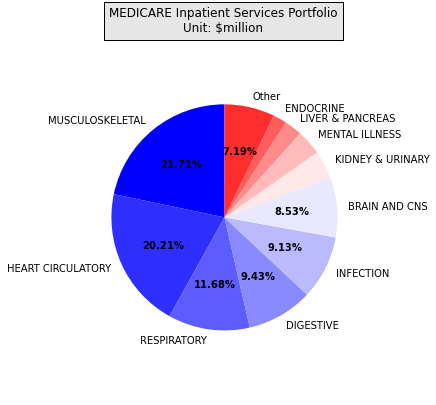

In [20]:
MEDICARE_order = MDC_Ins_table_MEDICARE.sort_values('MEDICARE', ascending = False)

import matplotlib.pyplot as plt
temp = MEDICARE_order
temp2 = temp.head(10)
if len(temp) > 10:
    temp2.loc['Other'] = temp[10:].sum()


name = list(temp2.index)

sizes = temp2.iloc[:,0]
labels = name
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000,labels=name)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')

plt.title("MEDICARE Inpatient Services Portfolio\n"+"Unit: $million", bbox={'facecolor':'0.9', 'pad':5})
plt.show()


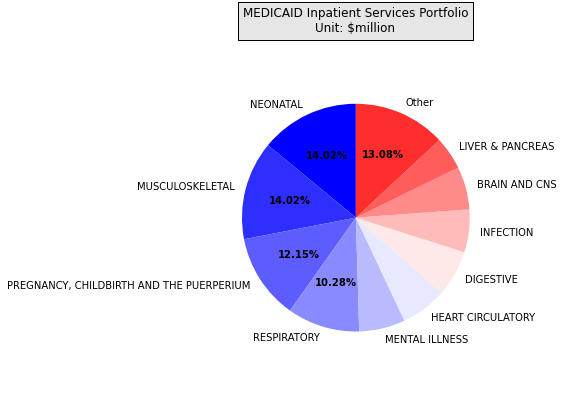

In [19]:
MEDICAID_order = MDC_Ins_table_MEDICAID.sort_values('MEDICAID', ascending = False)

import matplotlib.pyplot as plt
temp = MEDICAID_order
temp2 = temp.head(10)
if len(temp) > 10:
    temp2.loc['Other'] = temp[10:].sum()


name = list(temp2.index)

import matplotlib.pyplot as plt
 
sizes = temp2.iloc[:,0]
labels = name
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000,labels=name)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')

plt.title("MEDICAID Inpatient Services Portfolio\n"+"Unit: $million", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

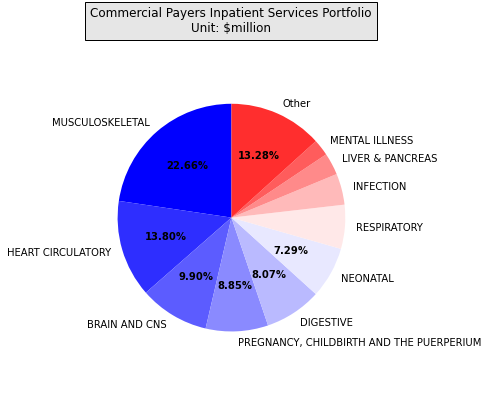

In [18]:
Commercial_Payers_order = MDC_Ins_table_ComPayers.sort_values('Commercial Payers', ascending = False)

import matplotlib.pyplot as plt
temp = Commercial_Payers_order
temp2 = temp.head(10)
if len(temp) > 10:
    temp2.loc['Other'] = temp[10:].sum()


name = list(temp2.index)

import matplotlib.pyplot as plt
 
sizes = temp2.iloc[:,0]
labels = name
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])


def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000,labels=name)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')

plt.title("Commercial Payers Inpatient Services Portfolio\n"+"Unit: $million", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

In [36]:
df_in_all = df_in.apply(pd.to_numeric,errors='coerce')
df_in_all["CHRGS"] = pd.to_numeric(df_in_all["CHRGS"])
df_in_all= df_in_all.dropna(subset=["CHRGS"])

In [37]:
df_in_all['intage'].replace({1:'Under 1', 2: '1-17',3:'18-24',4:'25-29',5:'30-34',6:'35-39',7:'40-44',
                                    8:'45-49',9:'50-54',10:'55-59',11:'60-64',12:'65-69',13:'70-74',14:'75 and over',15:'Unknown'}, inplace=True)
df_in_all['sex'].replace({1:'Male', 2: 'Female'}, inplace=True)
df_in_all['MDC'].replace({1:'BRAIN AND CNS',2:'EYE',3:'EAR, NOSE & THROAT',4:'RESPIRATORY',5:'HEART CIRCULATORY',6:'DIGESTIVE',
7:'LIVER & PANCREAS',8:'MUSCULOSKELETAL',9:'SKIN AND BREAST',10:'ENDOCRINE',11:'KIDNEY & URINARY',12:'MALE REPRODUCTIVE',
13:'FEMALE REPRODUCTIVE',14:'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM',15:'NEONATAL',16:'SPLEEN & BLOOD',17:'LYMPHATIC',
18:'INFECTION',19:'MENTAL ILLNESS',20:'SUBSTANCE ABUSE',21:'INJURY, TOXIC EFFECTS',22:'BURNS',23:'ALL OTHER',24:'TRAUMA',25:'HIV'}, inplace=True)
df_in_all['PPAY'].replace({1:'MEDICARE', 2: 'MEDICAID',6: 'Commercial Payers',7: 'Commercial Payers'}, inplace=True)


In [38]:
df_in_3co_wo_cat =df_in_all[df_in_all['PPAY'].isin(['MEDICARE','MEDICAID','Commercial Payers'])]
df_in_3co_wo_cat_new = df_in_3co_wo_cat[['PPAY','MDC','sex','intage','CHRGS']]



# Medicare data analytics

In [55]:
#Medicare data
df_in_3co_wo_cat_new_medicare = df_in_3co_wo_cat_new[df_in_3co_wo_cat_new['PPAY'] =='MEDICARE']

mdc_intage_table_medicare = df_in_3co_wo_cat_new_medicare.groupby([ 'MDC','intage','sex'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)



In [111]:
#Filter top 10 MDC
MEDICARE_order_top10 = pd.DataFrame(MEDICARE_order.index[:10])
MEDICARE_order_top10.columns=['MDC']
MEDICARE_order_top10_table = pd.merge(MEDICARE_order_top10 ,mdc_intage_table_medicare,how='left',on=['MDC'])
display(MEDICARE_order_top10_table)


,MDC,intage,Female,Male
0,MUSCULOSKELETAL,18-24,12361,0
1,MUSCULOSKELETAL,25-29,7427,0
2,MUSCULOSKELETAL,30-34,542185,137658
3,MUSCULOSKELETAL,35-39,50158,16010
4,MUSCULOSKELETAL,40-44,486113,314801
5,MUSCULOSKELETAL,45-49,713349,401123
6,MUSCULOSKELETAL,50-54,1849815,1584242
7,MUSCULOSKELETAL,55-59,2469194,2243506
8,MUSCULOSKELETAL,60-64,3682054,3382544
9,MUSCULOSKELETAL,65-69,17117893,13693712


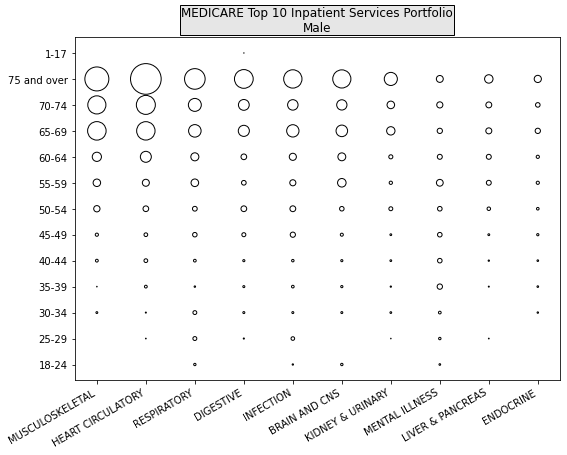

In [95]:
MEDICARE_order_top10_table["Markersize_Male"] = MEDICARE_order_top10_table.iloc[:,3]/40000
fig = plt.figure(figsize=(8, 6))
#plot categorical scatter plot
plt.scatter(MEDICARE_order_top10_table.MDC, MEDICARE_order_top10_table.intage, s = MEDICARE_order_top10_table.Markersize_Male, edgecolors = "black", c = "white", zorder = 1)
#plot grid behind markers
#plt.grid(ls = "--", zorder = 1)
#take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.title("MEDICARE Top 10 Inpatient Services Portfolio\n"+"Male", bbox={'facecolor':'0.9', 'pad':1})
plt.show()

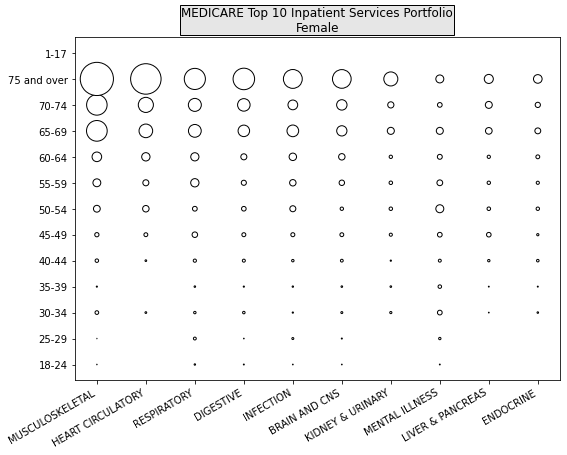

In [94]:
MEDICARE_order_top10_table["Markersize_Female"] = MEDICARE_order_top10_table.iloc[:,2]/40000
fig = plt.figure(figsize=(8, 6))
#plot categorical scatter plot
plt.scatter(MEDICARE_order_top10_table.MDC, MEDICARE_order_top10_table.intage, s = MEDICARE_order_top10_table.Markersize_Female, edgecolors = "black", c = "white", zorder = 1)
#plot grid behind markers
#plt.grid(ls = "--", zorder = 1)
#take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.title("MEDICARE Top 10 Inpatient Services Portfolio\n"+"Female", bbox={'facecolor':'0.9', 'pad':1})
plt.show()

# Medicaid data analytics

In [53]:
df_in_3co_wo_cat_new_medicaid = df_in_3co_wo_cat_new[df_in_3co_wo_cat_new['PPAY'] =='MEDICAID']

mdc_intage_table_medicaid = df_in_3co_wo_cat_new_medicaid.groupby([ 'MDC','intage','sex'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)


In [112]:
MEDICAID_order_top10 = pd.DataFrame(MEDICAID_order.index[:10])
MEDICAID_order_top10.columns=['MDC']
MEDICAID_order_top10_table = pd.merge(MEDICAID_order_top10 ,mdc_intage_table_medicaid,how='left',on=['MDC'])
display(MEDICAID_order_top10_table)

,MDC,intage,Female,Male
0,NEONATAL,Under 1,14446660,16492056
1,MUSCULOSKELETAL,1-17,727244,898731
2,MUSCULOSKELETAL,18-24,332867,592007
3,MUSCULOSKELETAL,25-29,497423,940510
4,MUSCULOSKELETAL,30-34,823445,1249764
5,MUSCULOSKELETAL,35-39,1155779,678346
6,MUSCULOSKELETAL,40-44,1169293,1185573
7,MUSCULOSKELETAL,45-49,1065964,1538981
8,MUSCULOSKELETAL,50-54,2668137,2417394
9,MUSCULOSKELETAL,55-59,3004906,3709188


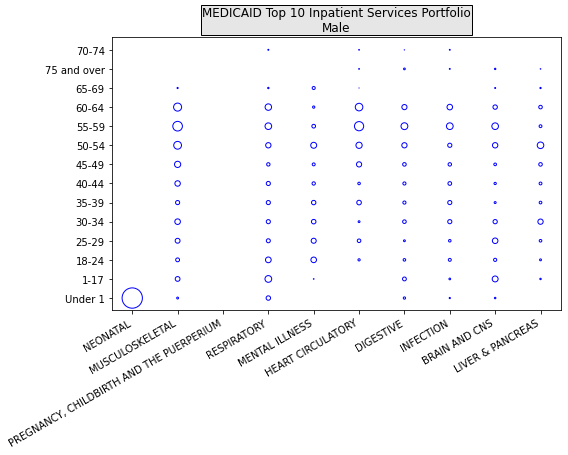

In [93]:
MEDICAID_order_top10_table["Markersize_Male"] = MEDICAID_order_top10_table.iloc[:,3]/40000
fig = plt.figure(figsize=(8, 6))
#plot categorical scatter plot
plt.scatter(MEDICAID_order_top10_table.MDC, MEDICAID_order_top10_table.intage, s = MEDICAID_order_top10_table.Markersize_Male, edgecolors = "blue", c = "white", zorder = 1)
#plot grid behind markers
#plt.grid(ls = "--", zorder = 1)
#take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.title("MEDICAID Top 10 Inpatient Services Portfolio\n"+"Male", bbox={'facecolor':'0.9', 'pad':1})
plt.show()

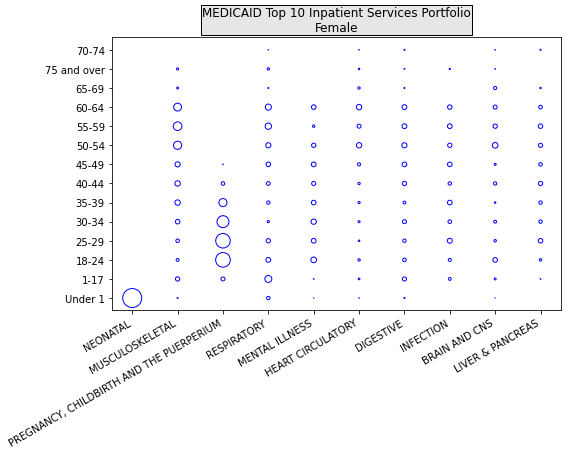

In [92]:
MEDICAID_order_top10_table["Markersize_Female"] = MEDICAID_order_top10_table.iloc[:,2]/40000
fig = plt.figure(figsize=(8, 6))
#plot categorical scatter plot
plt.scatter(MEDICAID_order_top10_table.MDC, MEDICAID_order_top10_table.intage, s = MEDICAID_order_top10_table.Markersize_Female, edgecolors = "blue", c = "white", zorder = 1)
#plot grid behind markers
#plt.grid(ls = "--", zorder = 1)
#take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.title("MEDICAID Top 10 Inpatient Services Portfolio\n"+"Female", bbox={'facecolor':'0.9', 'pad':1})
plt.show()

# Commercial Payers data analytics

In [52]:
df_in_3co_wo_cat_new_compay = df_in_3co_wo_cat_new[df_in_3co_wo_cat_new['PPAY'] =='Commercial Payers']

mdc_intage_table_compay = df_in_3co_wo_cat_new_compay.groupby([ 'MDC','intage','sex'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)



In [113]:
Commercial_Payers_order_top10 = pd.DataFrame(Commercial_Payers_order.index[:10])
Commercial_Payers_order_top10.columns=['MDC']
Commercial_Payers_order_top10_table = pd.merge(Commercial_Payers_order_top10 ,mdc_intage_table_compay,how='left',on=['MDC'])
display(Commercial_Payers_order_top10_table)

,MDC,intage,Female,Male
0,MUSCULOSKELETAL,1-17,1536091,1014552
1,MUSCULOSKELETAL,18-24,720618,1422166
2,MUSCULOSKELETAL,25-29,675637,844551
3,MUSCULOSKELETAL,30-34,538659,613940
4,MUSCULOSKELETAL,35-39,688715,1913732
5,MUSCULOSKELETAL,40-44,1574930,1546659
6,MUSCULOSKELETAL,45-49,2367275,1943101
7,MUSCULOSKELETAL,50-54,5642804,5996245
8,MUSCULOSKELETAL,55-59,8267671,8683577
9,MUSCULOSKELETAL,60-64,11571936,11071721


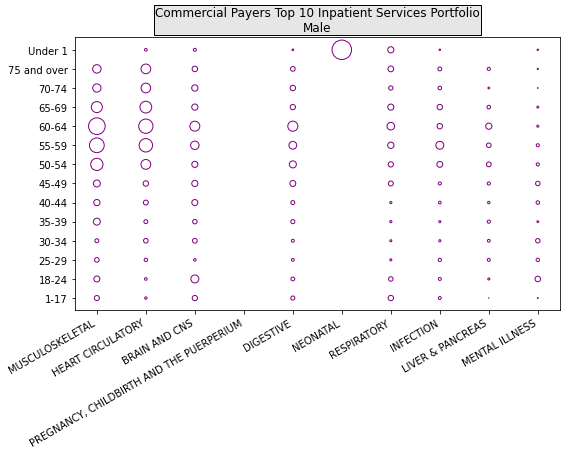

In [91]:
Commercial_Payers_order_top10_table["Markersize_Male"] = Commercial_Payers_order_top10_table.iloc[:,3]/40000
fig = plt.figure(figsize=(8, 6))
#plot categorical scatter plot
plt.scatter(Commercial_Payers_order_top10_table.MDC, Commercial_Payers_order_top10_table.intage, s = Commercial_Payers_order_top10_table.Markersize_Male, edgecolors = "purple", c = "white", zorder = 1)
#plot grid behind markers
#plt.grid(ls = "--", zorder = 1)
#take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.title("Commercial Payers Top 10 Inpatient Services Portfolio\n"+"Male", bbox={'facecolor':'0.9', 'pad':1})
plt.show()

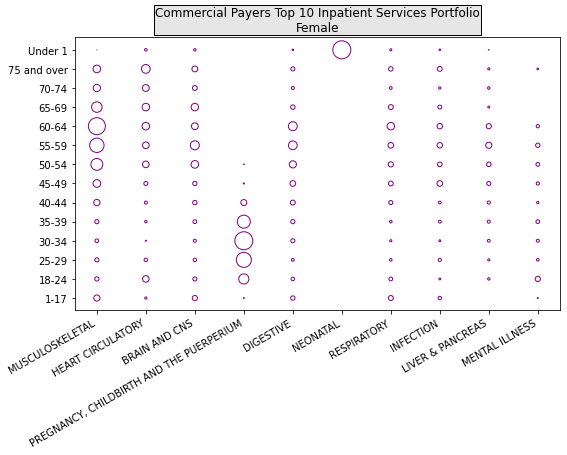

In [90]:
Commercial_Payers_order_top10_table["Markersize_Female"] = Commercial_Payers_order_top10_table.iloc[:,2]/40000
fig = plt.figure(figsize=(8, 6))
#plot categorical scatter plot
plt.scatter(Commercial_Payers_order_top10_table.MDC, Commercial_Payers_order_top10_table.intage, s = Commercial_Payers_order_top10_table.Markersize_Female, edgecolors = "purple", c = "white", zorder = 1)
#plot grid behind markers
#plt.grid(ls = "--", zorder = 1)
#take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.title("Commercial Payers Top 10 Inpatient Services Portfolio\n"+"Female", bbox={'facecolor':'0.9', 'pad':1})
plt.show()